##Titanic Survival Prediction

# Part A: Data Ingestion & Exploration

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB
None
       PassengerId    Survived      Pclass         Age       SibSp  \
count   891.000000  891.000000  891.000000  714.000000  891.000000   
mean    446.000000    0.383838    2.308642   29.699118    0.523008   
std     257.353842    0.48659

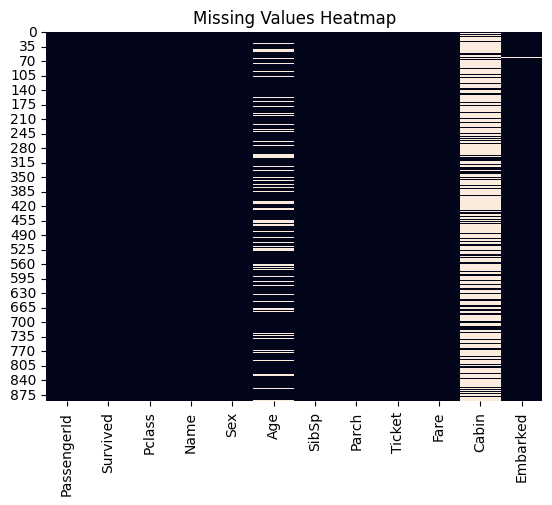

In [26]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

titanic_csv = pd.read_csv("train.csv")

df = pd.read_csv("train.csv")

print(df.info())
print(df.describe())
sns.heatmap(df.isnull(), cbar=False)
plt.title("Missing Values Heatmap")
plt.show()

# Part B: Handling Missing Values & Outliers


In [27]:
df['Age'] = df['Age'].fillna(df['Age'].median())

df['Embarked'] = df['Embarked'].fillna(df['Embarked'].mode()[0])

df['CabinFlag'] = df['Cabin'].notnull().astype(int)

Q1 = df['Fare'].quantile(0.25)
Q3 = df['Fare'].quantile(0.75)
IQR = Q3 - Q1
lower, upper = Q1 - 1.5*IQR, Q3 + 1.5*IQR
outliers = df[(df['Fare'] < lower) | (df['Fare'] > upper)]
print("Number of Fare outliers:", len(outliers))

df['Fare'] = np.log1p(df['Fare'])

Number of Fare outliers: 116


# Part C: Feature Engineering & Encoding

In [28]:
df['Title'] = df['Name'].str.extract(' ([A-Za-z]+)\\.')

df['FamilySize'] = df['SibSp'] + df['Parch'] + 1
df['IsAlone'] = (df['FamilySize'] == 1).astype(int)

df = pd.get_dummies(df, columns=['Sex', 'Embarked', 'Title'], drop_first=True)


# Part D: Normalization & Feature Selection

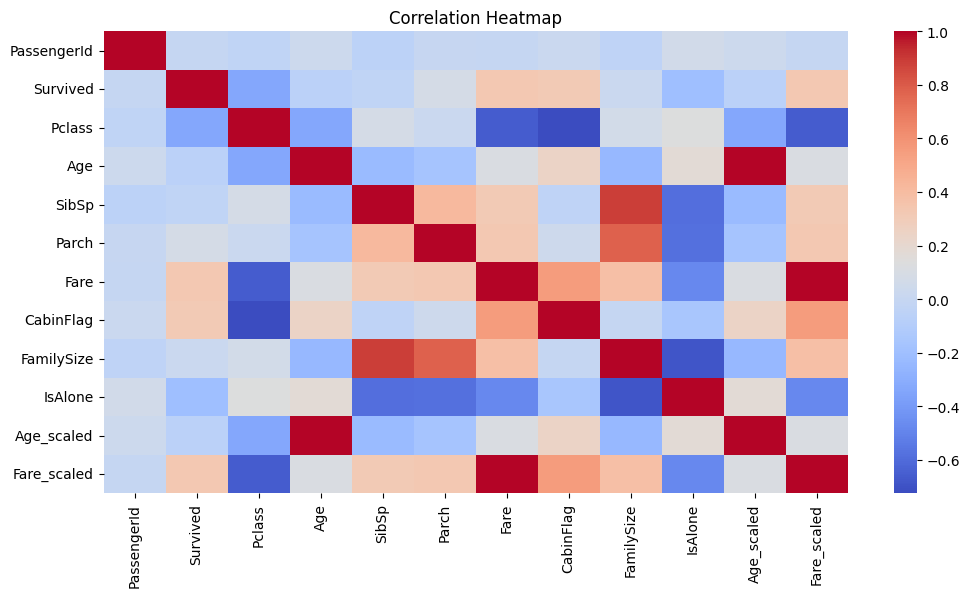

In [29]:
from sklearn.preprocessing import MinMaxScaler, StandardScaler

scaler = MinMaxScaler()
df['Age_scaled'] = scaler.fit_transform(df[['Age']])

std_scaler = StandardScaler()
df['Fare_scaled'] = std_scaler.fit_transform(df[['Fare']])

plt.figure(figsize=(12,6))
sns.heatmap(df.select_dtypes(include=[np.number]).corr(), cmap="coolwarm", cbar=True)
plt.title("Correlation Heatmap")
plt.show()


# Part E: Documentation Files


## Create decision_log.md

In [30]:
with open("decision_log.md", "w") as f:
    f.write("""# Decision Log

### Missing Values
- Age → Imputed with median.
- Embarked → Imputed with mode.
- Cabin → Dropped raw values, created CabinFlag.

### Outliers
- Fare → Detected using IQR, applied log-transform.

### Feature Engineering
- Extracted Title from Name.
- Created FamilySize and IsAlone.
- Added CabinFlag.

### Encoding
- One-hot encoding for categorical variables.

### Scaling
- Applied MinMax scaling (Age), Standard scaling (Fare).

### Feature Selection
- Correlation heatmap and model-based selection planned.""")

## Create data_card.md

In [31]:
with open("data_card.md", "w") as f:
    f.write("""# Data Card

### Dataset
Titanic passenger dataset (Kaggle).
Target: Survived (0 = No, 1 = Yes).

### Features
- Pclass: Passenger class
- Name: Used to extract Title
- Sex: Encoded (male/female)
- Age: Imputed + scaled
- SibSp, Parch: Used to create FamilySize
- Ticket: Not engineered further
- Fare: Log-transformed + scaled
- Cabin: Converted into CabinFlag
- Embarked: Mode-imputed, encoded
- Engineered: Title, FamilySize, IsAlone

### Known Biases
- Skewed by gender and social norms (women/children survival).
- First-class passengers more represented.
- Cabin missingness limits location insights.""")

## Create bias_note.txt

In [32]:
with open("bias_note.txt", "w") as f:
    f.write("""The Titanic dataset is not fully representative of real-world populations.
It reflects a specific early 20th-century passenger group, strongly shaped by class and gender.
Survival patterns were influenced by the “women and children first” policy, making gender a key predictor.
Wealthier, first-class passengers had better survival chances than third-class passengers,
introducing socioeconomic bias. Moreover, many records (like Cabin) are missing, limiting spatial insights.
This makes the dataset useful for machine learning education but not for drawing general conclusions
about disaster survival in modern contexts.""")

# Save Clean Dataset

In [33]:
df.to_csv("clean_titanic_v1.csv", index=False)

# Reflection Questions

# **Q1: When is deletion better than imputation?**


*   ## When missing values are very high (>70%) or missing completely at random, deletion prevents introducing noise.




# **Q2: What should we do with Cabin (77% missing)?**
* ## Dropping is reasonable, but we kept a CabinFlag to retain some signal.

# **Q3: How do missingness strategies impact generalization?**
* ## Poor imputation may add bias; good imputation improves robustness of the model.

# **Q4: Should billionaire fares be capped or left as extremes?**
* ## Log-transform handles extremes smoothly; capping may lose useful variance.
